In [2]:
!wget https://raw.githubusercontent.com/aspuru-guzik-group/chemical_vae/master/models/zinc_properties/250k_rndm_zinc_drugs_clean_3.csv

--2024-01-18 18:38:19--  https://raw.githubusercontent.com/aspuru-guzik-group/chemical_vae/master/models/zinc_properties/250k_rndm_zinc_drugs_clean_3.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22606589 (22M) [text/plain]
Saving to: ‘250k_rndm_zinc_drugs_clean_3.csv’

250k_rndm_zinc_drug 100%[===================>]  21.56M  21.9MB/s    in 1.0s    

2024-01-18 18:38:25 (21.9 MB/s) - ‘250k_rndm_zinc_drugs_clean_3.csv’ saved [22606589/22606589]



In [5]:
!cat ./250k_rndm_zinc_drugs_clean_3.csv | wc -l

498911


In [6]:
!head ./250k_rndm_zinc_drugs_clean_3.csv

smiles,logP,qed,SAS
"CC(C)(C)c1ccc2occ(CC(=O)Nc3ccccc3F)c2c1
",5.0506,0.702012232801,2.0840945720726807
"C[C@@H]1CC(Nc2cncc(-c3nncn3C)c2)C[C@@H](C)C1
",3.1137,0.928975488089,3.4320038192747795
"N#Cc1ccc(-c2ccc(O[C@@H](C(=O)N3CCCC3)c3ccccc3)cc2)cc1
",4.96778,0.599681738168,2.4706326078252
"CCOC(=O)[C@@H]1CCCN(C(=O)c2nc(-c3ccc(C)cc3)n3c2CCCCC3)C1
",4.00022,0.690944353014,2.8227533111709646
"N#CC1=C(SCC(=O)Nc2cccc(Cl)c2)N=C([O-])[C@H](C#N)C12CCCCC2


In [9]:
# LogP
# QED (Quantifying estimate of drug-likeness) (약물 유사성의 정량적 추정치 : 일반적으로 사용되는 정량적 약물 효능 평가 방법, PPI를 표적으로 하는 화합물에는 부적절)
# SAS (Synthetic Accessibility Score) (합성 복잡성(출발 물질 정보+구조적 복잡성)에 따라 유기 화합물의 합성 용이성을 나타냄, 가상 스크리닝 탐색을 위한 약물 유사 분자의 합성 접근성 점수)

In [10]:
import pandas as pd
df = pd.read_csv("./250k_rndm_zinc_drugs_clean_3.csv")
df

,smiles,logP,qed,SAS
0,CC(C)(C)c1ccc2occ(CC(=O)Nc3ccccc3F)c2c1\n,5.05060,0.702012,2.084095
1,C[C@@H]1CC(Nc2cncc(-c3nncn3C)c2)C[C@@H](C)C1\n,3.11370,0.928975,3.432004
2,N#Cc1ccc(-c2ccc(O[C@@H](C(=O)N3CCCC3)c3ccccc3)...,4.96778,0.599682,2.470633
3,CCOC(=O)[C@@H]1CCCN(C(=O)c2nc(-c3ccc(C)cc3)n3c...,4.00022,0.690944,2.822753
4,N#CC1=C(SCC(=O)Nc2cccc(Cl)c2)N=C([O-])[C@H](C#...,3.60956,0.789027,4.035182
...,...,...,...,...
249450,CC1(C)CC[C@H](CNC(=O)Cn2ncc3ccccc3c2=O)c2ccccc...,3.36790,0.745901,2.900726
249451,Cn1ccnc1C(=O)c1ccc(NC(=O)C2CCN(C(=O)C(C)(C)C)C...,2.87430,0.799426,2.326627
249452,Cc1ccc(NC(=O)C(=O)N(C)Cc2ccccc2)c(C)c1\n,2.90054,0.878086,1.840642
249453,Cc1cc(C(=O)Nc2ccc(OCC(N)=O)cc2)c(C)n1C1CC1\n,2.55624,0.852917,2.024638


In [11]:
df.describe()

,logP,qed,SAS
count,249455.000000,249455.000000,249455.000000
mean,2.457093,0.728264,3.053235
std,1.434330,0.139565,0.834796
min,-6.876200,0.111811,1.132738
25%,1.574810,0.645872,2.416627
50%,2.605600,0.759878,2.892993
75%,3.486760,0.835714,3.545533
max,8.252100,0.947882,7.289283


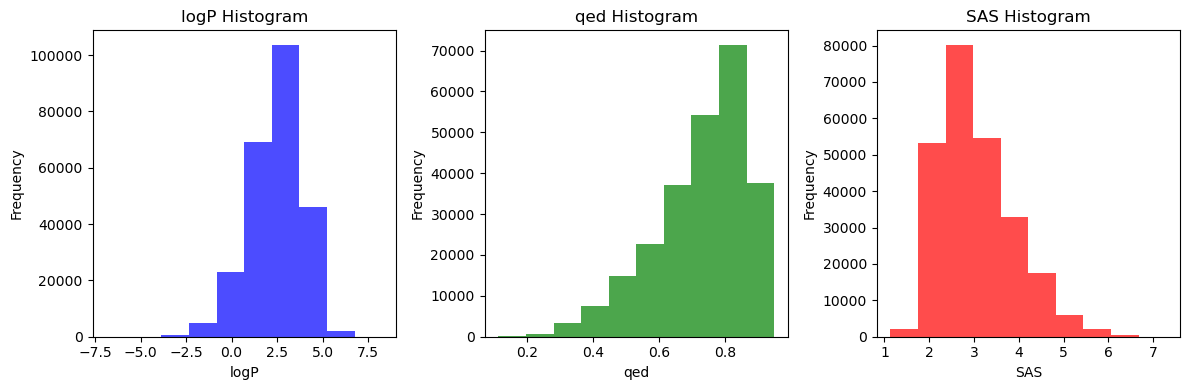

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.subplot(131)
plt.hist(df["logP"], bins=10, color="blue", alpha=0.7)
plt.title("logP Histogram")
plt.xlabel("logP")
plt.ylabel("Frequency")

plt.subplot(132)
plt.hist(df["qed"], bins=10, color="green", alpha=0.7)
plt.title("qed Histogram")
plt.xlabel("qed")
plt.ylabel("Frequency")

plt.subplot(133)
plt.hist(df["SAS"], bins=10, color="red", alpha=0.7)
plt.title("SAS Histogram")
plt.xlabel("SAS")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

## STRING database

In [16]:
!wget https://stringdb-downloads.org/download/protein.links.v12.0/9606.protein.links.v12.0.txt.gz

--2024-01-18 18:51:33--  https://stringdb-downloads.org/download/protein.links.v12.0/9606.protein.links.v12.0.txt.gz
Resolving stringdb-downloads.org (stringdb-downloads.org)... 49.12.123.75
Connecting to stringdb-downloads.org (stringdb-downloads.org)|49.12.123.75|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 83164437 (79M) [application/octet-stream]
Saving to: ‘9606.protein.links.v12.0.txt.gz’

9606.protein.links. 100%[===================>]  79.31M  8.44MB/s    in 11s     

2024-01-18 18:51:45 (7.52 MB/s) - ‘9606.protein.links.v12.0.txt.gz’ saved [83164437/83164437]



In [17]:
!gzip -d 9606.protein.links.v12.0.txt.gz

In [18]:
# The combined score is computed by combining the probabilities from the different evidence channels and corrected for the probability of randomly observing an interaction.
# Combined_score 범위:0 - 1000, min=150
!head 9606.protein.links.v12.0.txt

protein1 protein2 combined_score
9606.ENSP00000000233 9606.ENSP00000356607 173
9606.ENSP00000000233 9606.ENSP00000427567 154
9606.ENSP00000000233 9606.ENSP00000253413 151
9606.ENSP00000000233 9606.ENSP00000493357 471
9606.ENSP00000000233 9606.ENSP00000324127 201
9606.ENSP00000000233 9606.ENSP00000325266 180
9606.ENSP00000000233 9606.ENSP00000320935 181
9606.ENSP00000000233 9606.ENSP00000371175 594
9606.ENSP00000000233 9606.ENSP00000480364 154


In [20]:
df = pd.read_csv("9606.protein.links.v12.0.txt", sep=" ")
df

,protein1,protein2,combined_score
0,9606.ENSP00000000233,9606.ENSP00000356607,173
1,9606.ENSP00000000233,9606.ENSP00000427567,154
2,9606.ENSP00000000233,9606.ENSP00000253413,151
3,9606.ENSP00000000233,9606.ENSP00000493357,471
4,9606.ENSP00000000233,9606.ENSP00000324127,201
...,...,...,...
13715399,9606.ENSP00000501317,9606.ENSP00000475489,195
13715400,9606.ENSP00000501317,9606.ENSP00000370447,158
13715401,9606.ENSP00000501317,9606.ENSP00000312272,226
13715402,9606.ENSP00000501317,9606.ENSP00000402092,169


In [21]:
df.describe()

,combined_score
count,1.371540e+07
mean,2.686240e+02
std,1.569828e+02
min,1.500000e+02
25%,1.710000e+02
50%,2.090000e+02
75%,2.980000e+02
max,9.990000e+02


In [24]:
min(df["combined_score"]), max(df["combined_score"])

(150, 999)

(array([8268902., 2488640., 1158460.,  601074.,  396134.,  238656.,
         165242.,  119588.,  107844.,  170864.]),
 array([150. , 234.9, 319.8, 404.7, 489.6, 574.5, 659.4, 744.3, 829.2,
        914.1, 999. ]),
 <BarContainer object of 10 artists>)

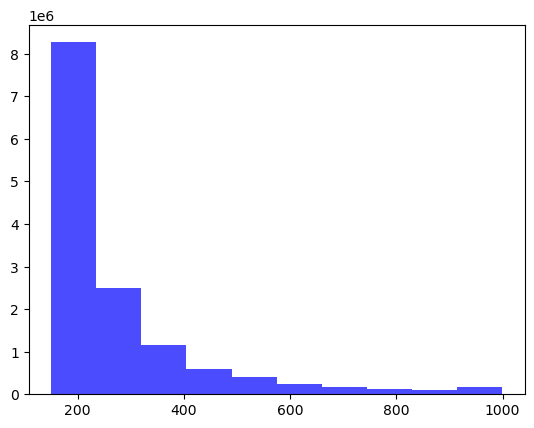

In [25]:
plt.hist(df["combined_score"], bins=10, color='blue', alpha=0.7)

In [26]:
sum(df['combined_score'] > 900) / len(df)

0.014420574122351773

## Drug-Target Interaction Database

In [27]:
!pip install PyTDC

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.7/107.7 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 24.0 MB/s eta 0:00:0000:0100:01
  Using cached tqdm-4.66.1-py3-none-any.whl.metadata (57 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 20.8 MB/s eta 0:00:0000:0100:01
  Using cached joblib-1.3.2-py3-none-any.whl.metadata (5.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 330.3/330.3 kB 29.0 MB/s eta 0:00:00
Using cached tqdm-4.66.1-py3-none-any.whl (78 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 26.3 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 41.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.0/169.0 kB 34.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 35.7 MB/s eta 0:00:00
  Created wheel for PyTDC: filename=PyTDC-0.4.1-py3-none-any.whl size=140644 sha256=ac0e268938505a7e350e82df78

In [28]:
from tdc.multi_pred import DTI
data = DTI(name = 'BindingDB_Kd')

Downloading...
100%|██████████| 54.4M/54.4M [00:19<00:00, 2.79MiB/s]
Loading...
Done!


In [32]:
dir(data)# dir은 해당 객체가 어떤 변수와 사용할 수 있는 method를 가지고 있는지 나열해줌

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'aux_column',
 'aux_column_val',
 'balanced',
 'binarize',
 'convert_from_log',
 'convert_to_log',
 'entity1',
 'entity1_idx',
 'entity1_name',
 'entity2',
 'entity2_idx',
 'entity2_name',
 'file_format',
 'get_data',
 'get_label_meaning',
 'get_split',
 'harmonize_affinities',
 'label_distribution',
 'label_name',
 'log_flag',
 'name',
 'neg_sample',
 'path',
 'print_stats',
 'raw_y',
 'to_graph',
 'two_types',
 'y']

In [33]:
data.get_data()

,Drug_ID,Drug,Target_ID,Target,Y
0,444607.0,Cc1ccc(CNS(=O)(=O)c2ccc(S(N)(=O)=O)s2)cc1,P00918,MSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKP...,0.460
1,4316.0,COc1ccc(CNS(=O)(=O)c2ccc(S(N)(=O)=O)s2)cc1,P00918,MSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKP...,0.490
2,4293.0,NS(=O)(=O)c1ccc(S(=O)(=O)NCc2cccs2)s1,P00918,MSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKP...,0.830
3,1611.0,NS(=O)(=O)c1cc2c(s1)S(=O)(=O)N(Cc1cccs1)CC2O,P00918,MSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKP...,0.200
4,1612.0,COc1ccc(N2CC(O)c3cc(S(N)(=O)=O)sc3S2(=O)=O)cc1,P00918,MSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKP...,0.160
...,...,...,...,...,...
52269,53358942.0,COc1cc(C(=O)O)ccc1NC(=O)[C@@H]1N[C@@H](CC(C)(C...,NaN,MCNTNMSVPTDGAVTTSQIPASEQETLVRPKPLLLKLLKSVGAQKD...,0.150
52270,53476877.0,CC(C)(C)C[C@@H]1N[C@@H](C(=O)N[C@H]2CC[C@H](O)...,NaN,MCNTNMSVPTDGAVTTSQIPASEQETLVRPKPLLLKLLKSVGAQKD...,2.700
52271,58573469.0,CC(C)[C@@H](CS(=O)(=O)C(C)C)N1C(=O)[C@@](C)(CC...,NaN,MCNTNMSVPTDGAVTTSQIPASEQETLVRPKPLLLKLLKSVGAQKD...,0.045
52272,113557.0,CCCCCCCOC1OC(CO)C(O)C(O)C1O,P08191,MKRVITLFAVLLMGWSVNAWSFACKTANGTAIPIGGGSANVYVNLA...,17.000


In [36]:
data.get_data()['Y'].describe()

count    5.227400e+04
mean     4.353189e+04
std      4.102312e+05
min      0.000000e+00
25%      2.200000e+02
50%      9.800000e+03
75%      1.000000e+04
max      1.000000e+07
Name: Y, dtype: float64

In [37]:
min(data.get_data()['Y']), max(data.get_data()['Y'])

(0.0, 10000000.0)